**HIERARCHICAL CLUSTERING!! - 360DIGITMG**

Clustering algorithms are unsupervised machine learning algorithms so there is no label associated with data points.
Clustering algorithms look for similarities or dissimilarities among data points so that similar ones can be grouped together.

Hierarchical clustering (also called hierarchical cluster analysis or HCA) is a method of cluster analysis which seeks to
build a hierarchy of clusters. Strategies for hierarchical clustering generally fall into two types:

Agglomerative : This is a "bottom-up" approach: each observation starts in its own cluster, and pairs of clusters are merged 
                as one moves up the hierarchy.
Divisive :      This is a "top-down" approach: all observations start in one cluster, and splits are performed recursively as 
                one moves down the hierarchy.

# Clustering problem 4:
    Perform clustering on mixed data. Convert the categorical variables to numeric by using dummies or label encoding and 
    perform normalization techniques. The data set consists of details of customers related to their auto insurance.
    Refer to Autoinsurance.csv dataset.

As a first step towards your solution, we need to understand the data and hence we load the same and the libraries required

In [3]:
import pandas as pd               # for Data Manipulation
import matplotlib.pyplot as plt   # for Visualization
import numpy as np                # for Mathematical calculations
import seaborn as sns             # for Advanced visualizations

auto = pd.read_csv("AutoInsurance.csv")

In [4]:
auto

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,1,2,3.000000,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22.000000,23,24
1,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
2,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
3,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
4,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9130,LA72316,California,23405.987980,No,Basic,Bachelor,10-02-2011,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9131,PK87824,California,3096.511217,Yes,Extended,College,12-02-2011,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9132,TD14365,California,8163.890428,No,Extended,Bachelor,06-02-2011,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9133,UP19263,California,7524.442436,No,Extended,College,03-02-2011,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [6]:
# We see the columns in the dataset
auto.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

**Data Description:**
The file Auto_Insurance contains information on customers who have taken up vehicle insurance. 
For each Insured customer the data includes information on their history and on different features that explain the details of the insurance. The goal is to try to identify fraud insurance claim among the lot seeking the various featuers provided.

Customer -- Customer ID

State -- The State the insured customer belongs too

Customer Lifetime Value -- Timeline since the customer is a customer to the insurance company

Response -- 

Coverage -- Category of the coverage provided by the insurance to the insured

Education -- Educational qualification of the Insured

Effective to date -- Till when is the insurance valid

EmploymentStatus -- Employent status of the Insured

Gender - Gender of the Insured

Income - Monthly income of the Insured person

Location Code -- Location code of the person residing at

Marital Status -- Marital status of the Insured

Monthly Premium Auto -- Monthly premium of the Insurance

Months Since Last Claim

Months since Policy Inception -- Months since policy started/ came into action

Number of open complaints -- Open compaints if any

Number of Policies -- Number of policies held by the Insured

Policy Type -- Policy type of the Insurance i.e Personal or Corporate

Policy -- Policy category under type

Renew offer type -- Offer type to renew the insurance selected

Sales Channel -- The channel from where the Insurance was sold or incepted.

Total Claim Amount -- The claim amount allotted for the vehicle insurance

Vehicle Class - Vehicle class

Vehicle Size -- The size of the vehicle

In [7]:
# As a part of the Data cleansing we check the data for any missing/ na values
auto.isna().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [8]:
# Additionally we check the data for any duplicate values, now this can be an optional check depending on the data being used
auto1 = auto.duplicated()
sum(auto1)

0

**Label Encoding the Categorical Features**

Looking at the data we note that we have most of the data in the form of category which needs to be changed to work on.

Hence we do label encoding for the features to encode the labesl within the features

In [9]:
# Import the Label Encoder from scikit learn
from sklearn.preprocessing import LabelEncoder

# Create instance of labelencoder
labelencoder = LabelEncoder()

In [10]:
# Separate the categorical and  in the dataset, which can be concatenated later
x = auto.iloc[:, [1, 3, 4, 5, 7, 8, 10, 11, 17, 18, 19, 20, 22, 23]]   # move columns that require encoding into x
x.isna().sum()       
y = auto.iloc[:, [0, 2, 6, 9, 12, 13, 14, 15, 16, 21]]     # move columns that do not require encoding into y

In [11]:
# Createing labels for each column
x['State'] = labelencoder.fit_transform(x['State'])
x['Response'] = labelencoder.fit_transform(x['Response'])
x['Coverage'] = labelencoder.fit_transform(x['Coverage'])
x['Education'] = labelencoder.fit_transform(x['Education'])
x['EmploymentStatus'] = labelencoder.fit_transform(x['EmploymentStatus'])
x['Gender'] = labelencoder.fit_transform(x['Gender'])
x['Location Code'] = labelencoder.fit_transform(x['Location Code'])
x['Policy Type'] = labelencoder.fit_transform(x['Policy Type'])
x['Policy'] = labelencoder.fit_transform(x['Policy'])
x['Renew Offer Type'] = labelencoder.fit_transform(x['Renew Offer Type'])
x['Sales Channel'] = labelencoder.fit_transform(x['Sales Channel'])
x['Marital Status'] = labelencoder.fit_transform(x['Marital Status'])
x['Vehicle Class'] = labelencoder.fit_transform(x['Vehicle Class'])
x['Vehicle Size'] = labelencoder.fit_transform(x['Vehicle Size'])


<ipython-input-11-d0dbd358e5cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['State'] = labelencoder.fit_transform(x['State'])
<ipython-input-11-d0dbd358e5cf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Response'] = labelencoder.fit_transform(x['Response'])
<ipython-input-11-d0dbd358e5cf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

In [12]:
# label encode y ##
y = pd.DataFrame(y)

In [13]:
# Concatenate x and y
auto_new = pd.concat([x, y], axis = 1)
auto_new.columns
auto_new.isna().sum()

State                            0
Response                         0
Coverage                         0
Education                        0
EmploymentStatus                 0
Gender                           0
Location Code                    0
Marital Status                   0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Vehicle Class                    0
Vehicle Size                     0
Customer                         0
Customer Lifetime Value          0
Effective To Date                0
Income                           0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Total Claim Amount               0
dtype: int64

In [14]:
auto_new.describe()
auto_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9135 entries, 0 to 9134
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          9135 non-null   int32  
 1   Response                       9135 non-null   int32  
 2   Coverage                       9135 non-null   int32  
 3   Education                      9135 non-null   int32  
 4   EmploymentStatus               9135 non-null   int32  
 5   Gender                         9135 non-null   int32  
 6   Location Code                  9135 non-null   int32  
 7   Marital Status                 9135 non-null   int32  
 8   Policy Type                    9135 non-null   int32  
 9   Policy                         9135 non-null   int32  
 10  Renew Offer Type               9135 non-null   int32  
 11  Sales Channel                  9135 non-null   int32  
 12  Vehicle Class                  9135 non-null   i

Outlier Treatment!!!

Data can have outliers which may effect the analysis in a big way. In order to check outliers, we use the Boxplots.

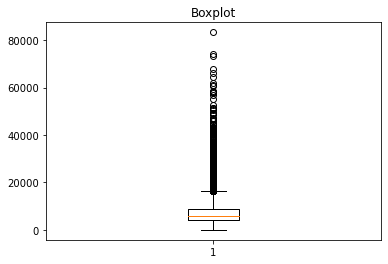

In [15]:
# Plot boxplot for the data using each feature independently and check for Outliers
plt.boxplot(auto_new['Customer Lifetime Value']);plt.title('Boxplot');plt.show()

# Outliers observed for "Balance" Feature

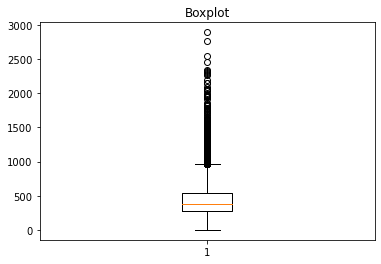

In [17]:
plt.boxplot(auto_new['Total Claim Amount']);plt.title('Boxplot');plt.show()

# Outliers are present

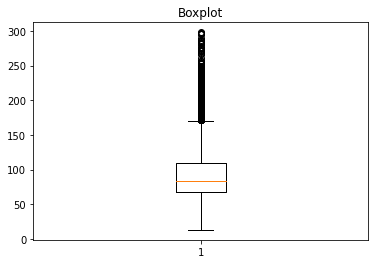

In [19]:
plt.boxplot(auto_new['Monthly Premium Auto']);plt.title('Boxplot');plt.show()

# Outliers are present

In order to deal with the outliers we can use one of "3R Techniques" viz:

    1. Rectify
    2. Retain
    3. Remove

In our example we choose to keep or retain the data and use the Winsorization technique!!! 

Mask the outliers and replace them with the values that constitute the 5th percentile and 95th percentile values, i.e, all data below 5th percentile gets replaced with the value of the 5th percentile and all the values above 95th percentile, with the 95th percentile value.

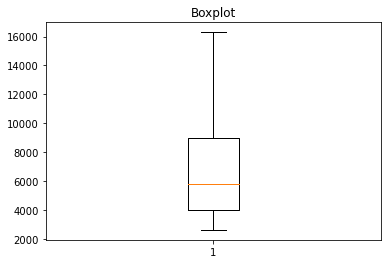

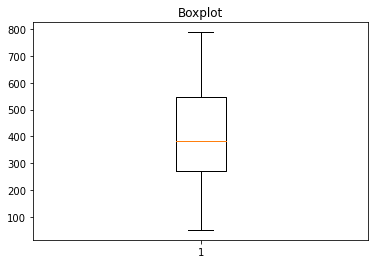

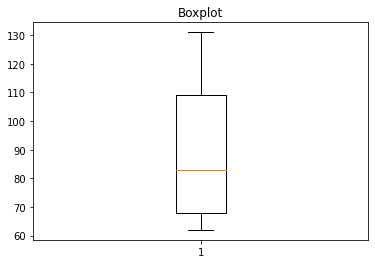

In [21]:
from scipy.stats.mstats import winsorize

auto_new['Customer Lifetime Value']=winsorize(auto_new['Customer Lifetime Value'],limits=[0.09, 0.091])   
plt.boxplot(auto_new['Customer Lifetime Value']);plt.title('Boxplot');plt.show()

auto_new['Total Claim Amount']=winsorize(auto_new['Total Claim Amount'],limits=[0.05, 0.095])   
plt.boxplot(auto_new['Total Claim Amount']);plt.title('Boxplot');plt.show()

auto_new['Monthly Premium Auto']=winsorize(auto_new['Monthly Premium Auto'],limits=[0.05, 0.095])   
plt.boxplot(auto_new['Monthly Premium Auto']);plt.title('Boxplot');plt.show()

In [23]:
# Check the data for zero variance values
auto_new.var() == 0  # find out which columns contain all zeros


State                            False
Response                         False
Coverage                         False
Education                        False
EmploymentStatus                 False
Gender                           False
Location Code                    False
Marital Status                   False
Policy Type                      False
Policy                           False
Renew Offer Type                 False
Sales Channel                    False
Vehicle Class                    False
Vehicle Size                     False
Customer Lifetime Value          False
Income                           False
Monthly Premium Auto             False
Months Since Last Claim          False
Months Since Policy Inception    False
Number of Open Complaints        False
Number of Policies               False
Total Claim Amount               False
dtype: bool

In [27]:
auto_new.columns

Index(['State', 'Response', 'Coverage', 'Education', 'EmploymentStatus',
       'Gender', 'Location Code', 'Marital Status', 'Policy Type', 'Policy',
       'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size',
       'Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')

In [28]:
# Check whether the data is in same/simillar scale
auto_new.describe

# We notice that the data needs to be normalize, using normalization

<bound method NDFrame.describe of       State  Response  Coverage  Education  EmploymentStatus  Gender  \
0         0         0         0          0                 0       0   
1         5         1         1          1                 2       1   
2         1         1         2          1                 5       1   
3         3         1         3          1                 2       1   
4         2         1         1          1                 5       2   
...     ...       ...       ...        ...               ...     ...   
9130      2         1         1          1                 2       2   
9131      2         2         2          2                 2       1   
9132      2         1         2          1                 5       2   
9133      2         1         2          2                 2       2   
9134      2         1         2          2                 5       2   

      Location Code  Marital Status  Policy Type  Policy  ...  Vehicle Class  \
0                 0  

In [29]:
from sklearn import preprocessing   # package for normalize
auto_normalized = preprocessing.normalize(auto_new)
print(auto_normalized)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 6.10575089e-03
  6.48736032e-03 1.98421246e-02]
 [8.87418827e-05 1.77483765e-05 1.77483765e-05 ... 0.00000000e+00
  1.77483765e-05 6.82977313e-03]
 [1.42355730e-04 1.42355730e-04 2.84711459e-04 ... 0.00000000e+00
  1.13884584e-03 1.12175363e-01]
 ...
 [2.43832107e-04 1.21916054e-04 2.43832107e-04 ... 3.65748161e-04
  2.43832107e-04 9.60690351e-02]
 [8.61850476e-05 4.30925238e-05 8.61850476e-05 ... 0.00000000e+00
  1.29277571e-04 2.97855524e-02]
 [7.55385444e-04 3.77692722e-04 7.55385444e-04 ... 0.00000000e+00
  3.77692722e-04 1.39595230e-01]]


State                            -1.250965
Response                          2.156019
Coverage                         -0.104936
Education                        -1.370129
EmploymentStatus                 -1.025225
Gender                           -1.992006
Location Code                    -0.269930
Marital Status                   -0.572022
Policy Type                       0.512035
Policy                            0.202202
Renew Offer Type                 -0.628068
Sales Channel                    -1.035815
Vehicle Class                    -1.532278
Vehicle Size                      0.359655
Customer Lifetime Value          -0.113826
Income                           -1.094344
Monthly Premium Auto             -1.156718
Months Since Last Claim          -1.073448
Months Since Policy Inception    -1.133179
Number of Open Complaints        15.969100
Number of Policies                0.464266
Total Claim Amount               -0.793646
dtype: float64

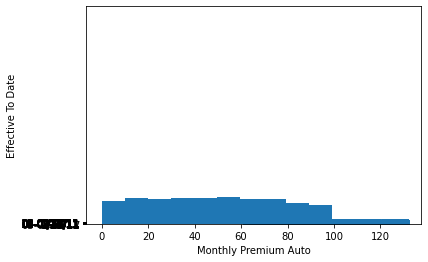

In [30]:
# Univariate, Bivariate Analysis
plt.hist(auto_new["Months Since Policy Inception"])   # Univariate

plt.hist(auto_new["Response"])

plt.scatter(auto_new["Monthly Premium Auto"], auto["Effective To Date"]);plt.xlabel('Monthly Premium Auto');plt.ylabel('Effective To Date')   #Bivariate

auto_new.skew(axis = 0, skipna = True) 

auto_new.kurtosis(axis = 0, skipna = True)

After all the analyses we now start with the Heirarchical Clustering procedure which would require us with 
building the dendogram

Now, one of the advantages of hierarchical clustering is that we do not have to specify the number of clusters. 
In order to determine the optimal number of clusters we plot the dendogram, which is a diagram representation 
of the tree based approach.

In [31]:
# In order to create a dendogram we need to define the linkage and create a distance matrix
# Load libraries for the same
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch 

In [32]:
### Finding the Distance using Euclidean Distance with 
# Complete (maximum) linkage: Maximum distance among all data points in two clusters
z = linkage(auto_normalized, method = "complete", metric = "euclidean")


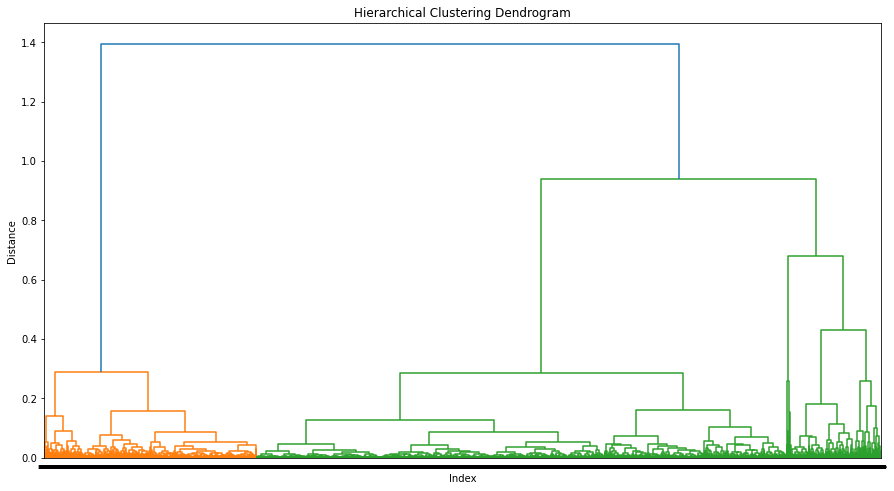

In [33]:
# Now we plot the dendogram
plt.figure(figsize=(15, 8));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(z, leaf_rotation = 0,  leaf_font_size = 5 )  
plt.show()

In [34]:
# Select the number of clusters from the dendogram as "4"

Hierarchical clustering means creating a tree of clusters by iteratively grouping or separating data points. 
    There are two types of hierarchical clustering:
    
    Agglomerative clustering
    Divisive clustering
Apply the Agglomerative clustering technique: Agglomerative clustering is a bottom-up approach. 
Each data point is assumed to be a separate cluster at first. Then the similar clusters are iteratively combined

In [35]:
from sklearn.cluster import AgglomerativeClustering
h_complete = AgglomerativeClustering(n_clusters = 3, linkage = 'complete', affinity = "euclidean").fit(auto_normalized) 
h_complete.labels_

array([1, 2, 1, ..., 1, 0, 1], dtype=int64)

In [36]:
# The labels for the clusters so formed are in the array form, which needs to be changed to incorporate into the dataset
# Type casting to change the array to a series
cluster_labels = pd.Series(h_complete.labels_)

In [37]:
# Incorporate the labels into the dataset as a new feature that will fit as per the records
auto_new['clust'] = cluster_labels

In [38]:
# View the data using head function
auto_new.head()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,...,Vehicle Size,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,clust
0,0,0,0,0,0,0,0,0,0,0,...,0,2619.027206,10,62,14,15,16,17,51.995897,1
1,5,1,1,1,2,1,2,2,1,3,...,2,2763.519279,56274,69,32,5,0,1,384.811147,2
2,1,1,2,1,5,1,2,3,2,6,...,2,6979.535903,0,94,13,42,0,8,787.993313,1
3,3,1,3,1,2,1,2,2,2,6,...,2,12887.431650,48767,108,18,38,0,2,566.472247,2
4,2,1,1,1,5,2,2,2,1,2,...,2,7645.861827,0,106,18,65,0,7,529.881344,1


In [1]:
# The labels in the dataset are added in the last column called "clust"

In [39]:
# Analyze each cluster - use aggregate function to group the records within the cluster and measure Mean
auto_new.iloc[:, 0:].groupby(auto_new.clust).mean()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,...,Vehicle Size,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,clust
clust,,,,,,,,,,,,,,,,,,,,,
0,2.717328,1.226525,1.636980,2.607938,2.246854,1.471442,2.013553,1.958374,1.854792,4.854792,...,2.133591,12130.923039,24951.585673,100.899322,15.525653,46.950629,0.298161,3.022265,494.247462,0.0
1,2.741588,1.084987,1.488352,2.515099,4.997843,1.509491,1.990078,2.486195,1.821829,4.777394,...,2.085418,6961.284849,0.004314,90.113891,15.243745,48.732528,0.398619,3.016825,535.812134,1.0
2,2.745678,1.151452,1.449343,2.559647,2.058091,1.485304,1.968188,2.002075,1.822095,4.794952,...,2.082988,6402.694265,55011.673755,86.765214,14.961445,47.990145,0.396784,2.938278,340.371754,2.0


We can now clearly see the 4 number of clusters formed, which can be described as under

    1. Cluster1 = "0" = Defines the group of Insured people who are midway between the two extremes and are the ones that 
                        might or might not give a fraud claim, but this cannot really be interpreted clearly.
    
    2. Cluster2 = "1" = Defines the group of Insured people who are the ones who have low income and are prone to the fraud 
                        transactions, also seeking this thye might be the customers that cause huge loss to the company.
    
    3. Cluster3 = "2" = Defines the group of Insured people with high income and less prone to a fraud transaction for sure.